In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from povertymapping.geoboundaries import get_geoboundaries

In [3]:
tl_admin = get_geoboundaries('timor-leste', adm='ADM2')

In [4]:
import geopandas as gpd

In [30]:
import pandas as pd
import numpy as np

In [5]:
tl_admin_gdf = gpd.read_file(tl_admin)

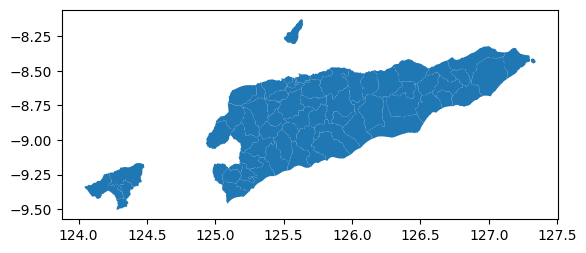

In [6]:
tl_admin_gdf.plot();

In [7]:
tl_admin_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shapeName   65 non-null     object  
 1   shapeISO    65 non-null     object  
 2   shapeID     65 non-null     object  
 3   shapeGroup  65 non-null     object  
 4   shapeType   65 non-null     object  
 5   geometry    65 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 3.2+ KB


In [8]:
from geowrangler.grids import BingTileGridGenerator

In [9]:
gridgen = BingTileGridGenerator(14)

In [10]:
%%time
tl_grids = gridgen.generate_grid(tl_admin_gdf)

CPU times: user 8.24 s, sys: 6.27 ms, total: 8.24 s
Wall time: 8.24 s


In [12]:
import geowrangler.spatialjoin_highest_intersection as sjhi

In [13]:

tl_grids = sjhi.get_highest_intersection(tl_grids,tl_admin_gdf,'epsg:3857')

<AxesSubplot: >

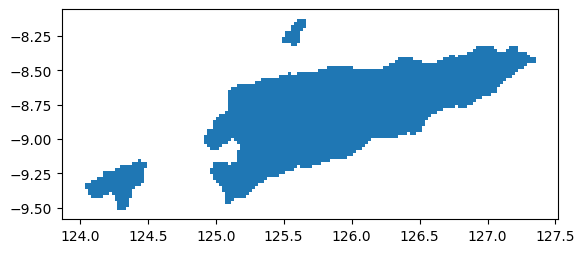

In [14]:
tl_grids.plot()

In [15]:
tl_grids.explore()

In [16]:
from povertymapping.hdx import get_hdx_file

In [17]:
%%time
tl_hdx = get_hdx_file('timor-leste')

CPU times: user 79.5 ms, sys: 0 ns, total: 79.5 ms
Wall time: 1.47 s


In [18]:
import rasterio as rio

In [19]:
with rio.open(tl_hdx) as src:
    data = src.read(1)
    profile = src.profile
    

In [20]:
print(profile)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': nan, 'width': 14400, 'height': 7200, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002777777777780012, 0.0, 123.99986111135561,
       0.0, -0.0002777777777780012, -7.999861111174923), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


In [24]:
import geowrangler.raster_zonal_stats as rzs

In [25]:
tl_grids_pop = tl_grids.copy()

In [33]:
tl_grids_pop = rzs.create_raster_zonal_stats(tl_grids_pop, tl_hdx,
                                             aggregation=dict(column='population',
                                                               output='pop_count',
                                                               func='sum'),
                                             extra_args=dict(
                                                 nodata=np.nan))

In [36]:
len(tl_grids_pop)

2811

In [37]:
len(tl_grids_pop[tl_grids_pop['pop_count'] > 0])

2024

In [38]:
tl_grids_pop = tl_grids_pop[tl_grids_pop['pop_count'] > 0]

In [39]:
tl_grids_pop.explore()